In [11]:
import re
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import nb_utils

def get_pd_times(log_files: list[Path], models):
	log_files_sorted = sorted(log_files, key=lambda f: f.stat().st_mtime)
	log = '\n'.join(sum((f.read_text().splitlines() for f in log_files_sorted), [])[::-1])
	has_pd = np.array([(log_files[0].parent / model).with_suffix('.pd.npy').exists()
		for model in models])
	times = np.array([float(re.search(model + r'/pds: ([\d\.]+)', log).group(1))
		for model in models])
	times[~has_pd] = np.nan
	return times

def get_all_pd_times(task, sampler=None):
	gen_gaps = nb_utils.gen_gaps[task]
	models = list(gen_gaps.keys())
	gaps = np.array(list(gen_gaps.values()))
	samplers, log_files = zip(*nb_utils.get_files(task, sampler, pattern='*log.txt'))
	times = np.array([get_pd_times(files, models) for files in log_files])
	return gaps, times, models, None if sampler else samplers

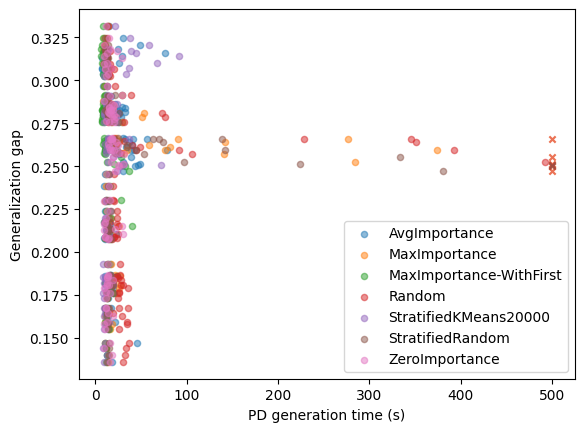

In [12]:
def plot_pd_times_gen_gaps(gaps, times, samplers):
	plt.title('')
	for x, sampler in zip(times, samplers):
		color = next(plt.gca()._get_lines.prop_cycler)['color']
		plt.scatter(x, gaps, s=20, alpha=0.5, label=sampler, color=color)
		if (nans := np.isnan(x)).any():
			plt.scatter([500]*nans.sum(), gaps[nans], s=20, alpha=0.5,
				marker='x', label='', color=color)
	plt.legend()
	plt.xlabel('PD generation time (s)')
	plt.ylabel('Generalization gap')
	plt.show()

gaps, times, models, samplers = get_all_pd_times(1)
plot_pd_times_gen_gaps(gaps, times, samplers)

In [15]:
import pandas as pd

ix = (np.isnan(times) | (times > 200)).any(axis=0)
pd.DataFrame(
	data=dict(zip(samplers, times[:,ix])),
	index=np.array(models)[ix]
).fillna('X')


,AvgImportance,MaxImportance,MaxImportance-WithFirst,Random,StratifiedKMeans20000,StratifiedRandom,ZeroImportance
model_28,49.307397,X,20.284209,X,31.642805,224.34377,30.498481
model_29,30.364415,X,37.148103,X,23.562235,379.908232,21.186192
model_30,36.424934,141.539464,11.820317,351.288313,14.329291,74.045154,22.584658
model_92,40.646594,276.187253,14.266946,345.237939,14.608175,69.250672,16.508750
model_93,30.235823,284.242543,12.573980,491.98472,14.112722,96.808836,16.619036
model_156,46.804137,X,28.775144,X,71.698594,X,24.646540
model_157,43.367246,X,32.693509,X,27.706855,X,25.882291
model_158,38.792394,374.115214,12.058708,392.706989,21.271653,141.63678,20.443081
model_159,32.223771,90.757511,12.699779,228.238523,14.043788,63.265419,16.629414
model_220,56.676614,X,19.979569,X,36.681743,138.516063,18.356655


In [9]:
log_files = [*nb_utils.get_files(task=1, sampler='random', pattern='*log.txt')]
times = np.array([get_pd_times(files, models) for files in log_files])
ix = np.isnan(times).any(axis=0)
pd.DataFrame(
	data=dict(zip([f[0].parts[-2] for f in log_files], times[:,ix])),
	index=np.array(models)[ix],
).fillna('X')

,22.12.16-15.14.30,22.12.21-18.06.40,22.12.21-20.38.16,22.12.30-18.47.09
model_28,X,X,X,X
model_29,X,X,X,X
model_156,X,X,X,X
model_157,X,X,X,X
model_220,X,X,X,X
model_221,X,X,X,X


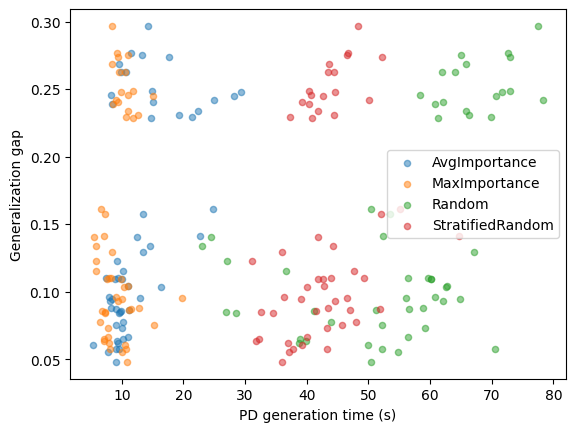

In [5]:
gaps, times, _, samplers = get_all_pd_times(2)
plot_pd_times_gen_gaps(gaps, times, samplers)